# Optimized Code

In [1]:
import d3dshot
import torch
import time
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [59]:
def down_up_sample(array, scale, size=(32,59)):
    """returns an array"""
    # interpolate accept size of (B, C, H, W) while B is the batch size, only 1
    return np.rollaxis(
        F.interpolate(
            F.interpolate(
                torch.from_numpy(
                    np.expand_dims(
                        np.rollaxis(array, 2),
                        axis=0)
                ),
                scale_factor=scale,
                mode='area'
            ),
            size=size,
            mode='bilinear',
            align_corners=False
        )[0].cpu().numpy()
    , 0, 3)

In [8]:
def benchmark(func, number, frame=60):
    total = 0
    for _ in range(number):
        start = time.perf_counter()
        for _ in range(frame):
            eval(func)
        diff = time.perf_counter() - start
        total += diff
        print(f'Took {diff}s')
    print(f'Totally: {total}s')
    print(f'Avg: {total/number}s')

In [3]:
d = d3dshot.create(capture_output="numpy_float")

In [4]:
#high-speed screen capture
d.capture(region=(0, 0, 1920, 1080))

True

In [5]:
image = d.get_latest_frame()

In [14]:
image.shape

(1080, 1920, 3)

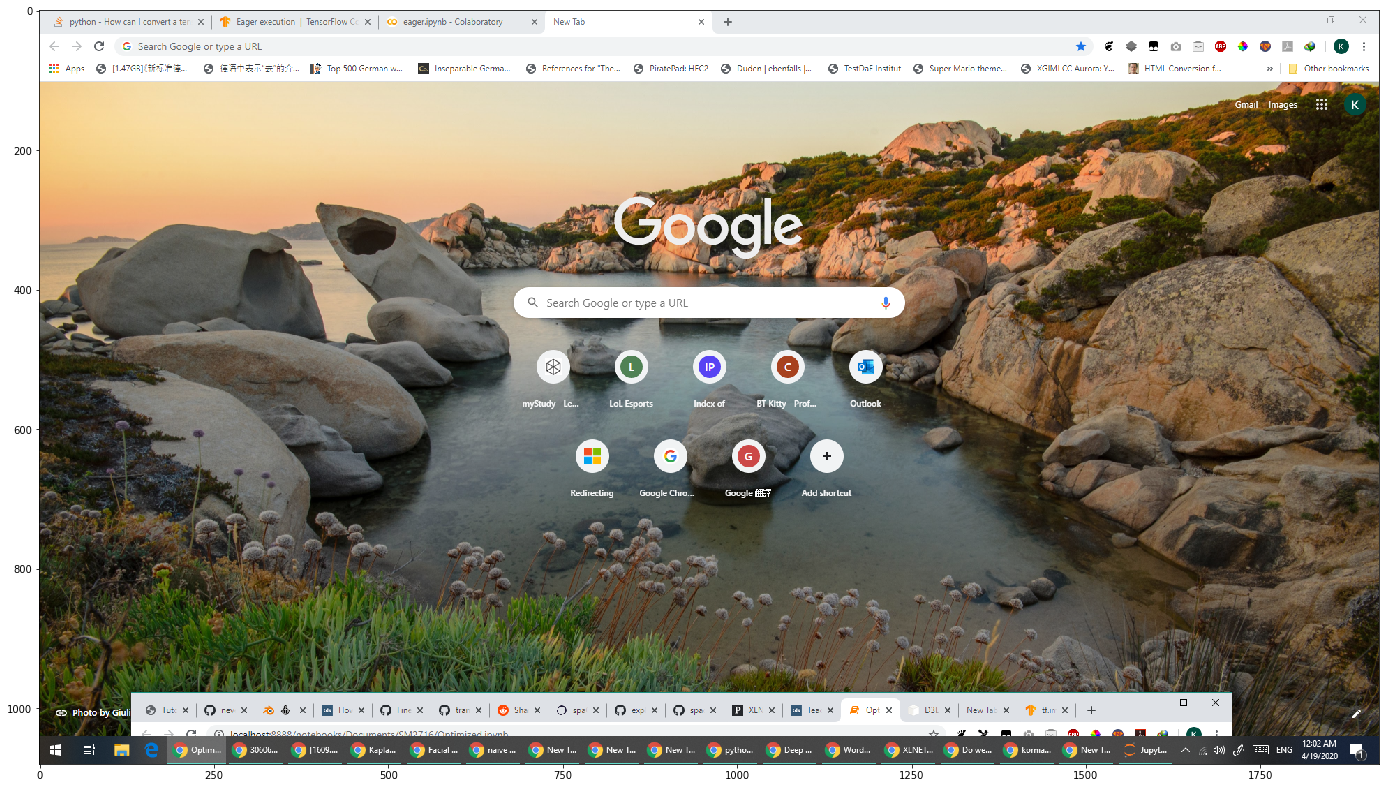

In [6]:
plt.figure(figsize=(24,16))
plt.imshow(image)
plt.show()

In [60]:
benchmark('down_up_sample(image, 0.01)', 10)

Took 1.414898199999925s
Took 1.442575899999838s
Took 1.4391848999998729s
Took 1.585811700000022s
Took 1.5431316000001516s
Took 1.5460688999999093s
Took 1.597229900000002s
Took 1.4567369000001236s
Took 1.554558100000122s
Took 1.2781084000000646s
Totally: 14.858304500000031s
Avg: 1.485830450000003s


In [51]:
image_r = down_up_sample(image, 0.01)
image_r.shape

(32, 59, 3)

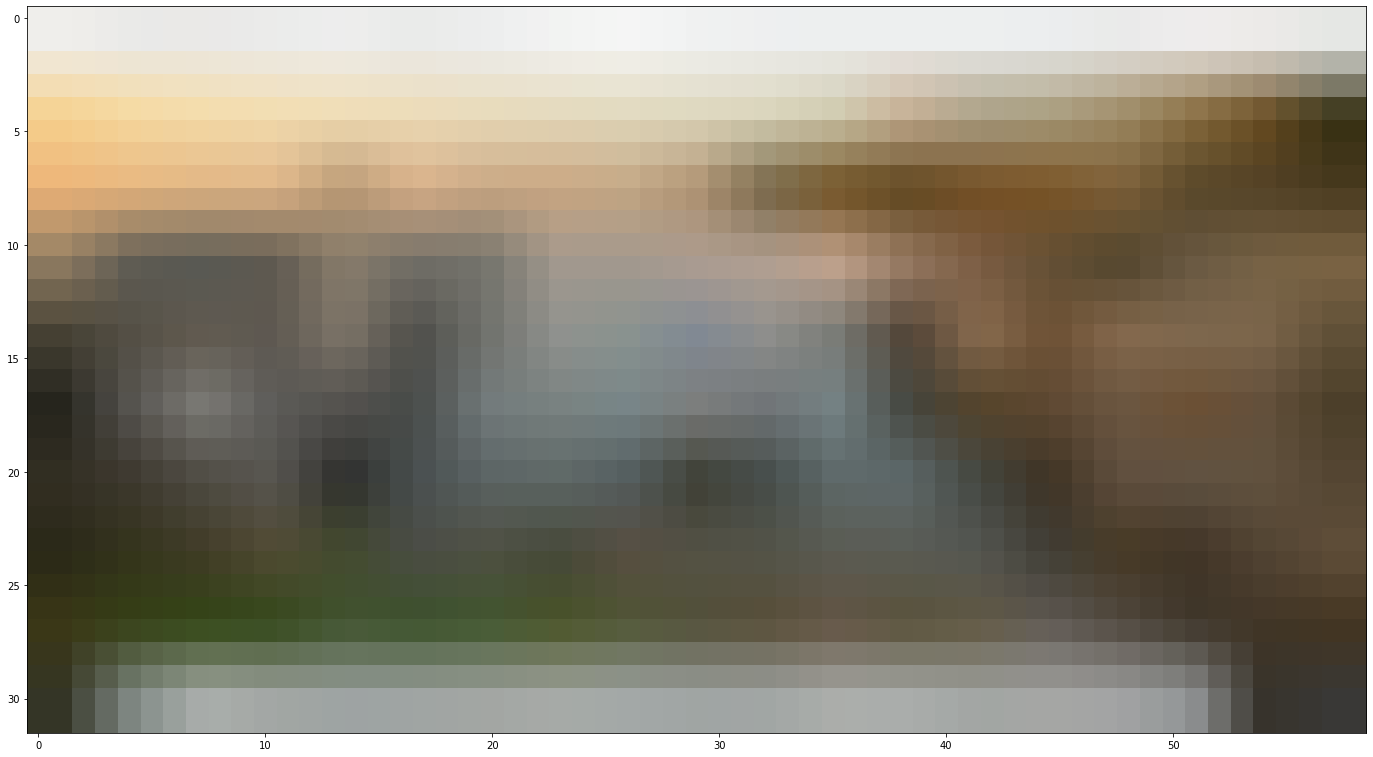

In [92]:
# area
plt.figure(figsize=(24,16))
plt.imshow(image_r)
plt.show()

In [109]:
bottom = image_r[-1, ::-1, :]

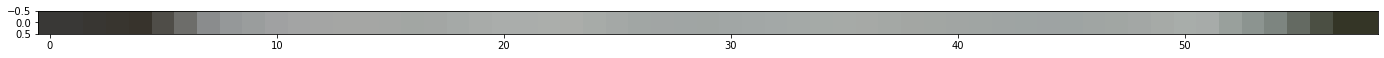

In [110]:
plt.figure(figsize=(24,16))
plt.imshow(np.expand_dims(bottom, axis=0))
plt.show()

In [118]:
left = image_r[-1:1:-1, 0, :]
left.shape

(30, 3)

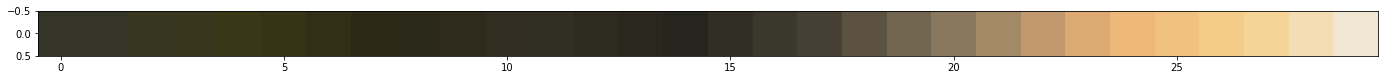

In [119]:
plt.figure(figsize=(24,8))
plt.imshow(np.expand_dims(left, axis=0))
plt.show()

In [93]:
top = np.resize(image_r[0], (55, 3))

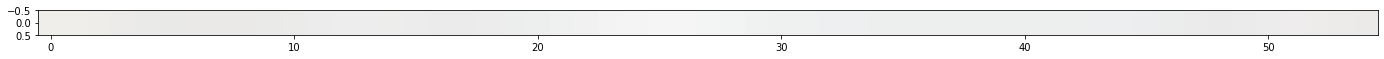

In [94]:
plt.figure(figsize=(24,16))
plt.imshow(np.expand_dims(top, axis=0))
plt.show()

In [120]:
right = image_r[1:-1, -1, :]

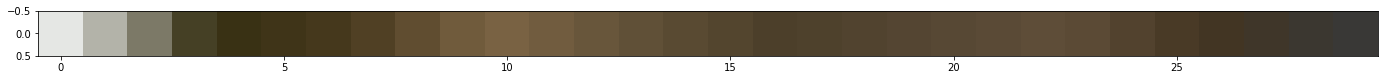

In [121]:
plt.figure(figsize=(24,8))
plt.imshow(np.expand_dims(right, axis=0))
plt.show()

In [128]:
def image_to_signal(array, brightness):
    return np.multiply(
        np.concatenate(
            (array[-1, ::-1, :], array[-1:1:-1, 0, :], np.resize(array[0], (55, 3)), array[1:-1, -1, :]),
            axis=0
        ).flatten(),
        brightness
    ).astype(int)

In [132]:
benchmark('image_to_signal(image_r, 255)', 10)

Took 0.005329600000095525s
Took 0.0036660000000665605s
Took 0.004640499999823078s
Took 0.0032264999999824795s
Took 0.003590799999983574s
Took 0.0033863999997265637s
Took 0.0032791999997243693s
Took 0.003515400000196678s
Took 0.003235799999856681s
Took 0.003321700000014971s
Totally: 0.03719189999947048s
Avg: 0.003719189999947048s


In [131]:
image_to_signal(image_r, 255).shape

(522,)